### Multi Layered Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class Neuron:
    def __init__(self, position, activation):
        self.position = position
        self.activation = activation
        self.delta = 0.0
        self.output_neurons = np.array([])
        self.output = None
        self.input = np.array([])
        self.weights = np.array([])

    def activation_function(self, x):
        """
            Activation function for the neuron
            Sigmoid, ReLU, Tanh

            :x: input value
            :return: output value
        """
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'tanh':
            return np.tanh(x)

    def activation_derivative(self):
        """
            Activation function derivative for the neuron
            Sigmoid, ReLU, Tanh

            :return: output value
        """
        if self.activation == 'sigmoid':
            return self.output * (1 - self.output)
        elif self.activation == 'relu':
            return 1.0 if self.output > 0 else 0.0
            # return np.where(self.output > 0, 1.0, 0.0)
        elif self.activation == 'tanh':
            return 1 - self.output ** 2


    def attach(self, neurons):
        """
            Attach the output neurons to this neuron
            :neurons: output neurons
            :return: None
        """
        self.output_neurons = neurons

    def init_weights(self, num_input):
        """
            Randomly init the weights in Uniform distribution [-0.5, 0.5]
            :num_input: number of input neurons
            :return: None
        """
        # Randomly init the weights in Uniform distribution [-0.5, 0.5]
        for i in range(num_input+1):
            self.weights = np.append(self.weights, np.random.uniform(-0.5, 0.5))

    def update_nuron(self):
        """
            Update the weights of this neuron
            :return: None
        """
        self.weights = np.array([])
        for new_weight in self.updated_weights:
            self.weights = np.append(self.weights, new_weight)

    def calc_weights(self, learning_rate, target=None):
        """
            Calculate the weights for this neuron
            :learning_rate: learning rate
            :target: target value
            :return: None
        """
        # Output neurons
        if target is not None:
            self.delta = (self.output - target) * self.activation_derivative()
        # Hidden neurons
        else:
            delta_sum = 0.0
            for next_neuron in self.output_neurons:
                delta_sum += next_neuron.delta * next_neuron.weights[self.position]
            self.delta = delta_sum * self.activation_derivative()

        # Update weights
        self.updated_weights = self.weights - learning_rate * self.delta * self.input


    def predict(self, row):
        """
            Predict the output of this neuron
            :row: input row
            :return: output value
        """
        # Reset output
        self.input = row
        # Find the weighted sum over input and weights
        weighted_sum = np.dot(self.weights, row)
        # Calc the output with activation function
        self.output = self.activation_function(weighted_sum)
        return self.output



In [3]:
class Layer:
    def __init__(self, num_neurons, activation):
        self.num_neurons = num_neurons
        self.activation = activation
        self.neurons = np.array([])
        self.bias = 1
        # Create required nurons in the layer
        for i in range(num_neurons):
            nuron = Neuron(position=i, activation=activation)
            self.neurons = np.append(self.neurons, nuron)

    def attach(self, layer):
        """
            Connecting the neurons of this layer to each layer of next layer
            :layer: current layer
            :return: None
        """
        # Attach the nurons of this layer to every nuron of next layer
        for neuron in self.neurons:
            neuron.attach(layer.neurons)

    def init_layer(self, num_input):
        """
            Init the weights of this layer
            :num_input: number of input neurons
            :return: None
        """
        # Init the weights to previous layers
        for nuron in self.neurons:
            nuron.init_weights(num_input)


    def predict(self, row):
        """
            Predict the output of this layer
            :row: input row
            :return: output value
        """
        # Add bias
        row = np.append(row, self.bias)

        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.predict(row))
        return np.array(outputs)



In [4]:
class MultiLayeredPerceptron:
    def __init__(self, learning_rate=0.5, num_of_iterations=20000):
        # Layers
        self.layers = np.array([], dtype=object)
        self.loss_history = np.array([])

        # Hyper parameters
        self.learning_rate = learning_rate
        self.num_of_iterations = num_of_iterations

    def add_output_layer(self, num_nuron, activation):
        """
            Add the output layer to architecture

            :num_nuron: number of neurons
            :activation: activation function
            :return: None
        """
        self.layers = np.append(self.layers, Layer(num_neurons=num_nuron, activation=activation))

    def add_hidden_layer(self, num_nuron, activation):
        """
            Add the hidden layer to architecture

            :num_nuron: number of neurons
            :activation: activation function
            :return: None
        """
        # Init a hidden layer
        hidden_layer = Layer(num_neurons=num_nuron, activation=activation)
        # Attach the new layer to right layer
        if len(self.layers) > 0:
            hidden_layer.attach(self.layers[-1])
        # Add the layer to architecture
        self.layers = np.append(self.layers, hidden_layer)

    def forward_propagation(self, row):
        """
            Forward propagation process to find the activation output

            :row: input
            :return: activation output
        """
        output = row
        for layer in self.layers:
            output = layer.predict(output)
        return output

    def back_propagtion(self, target):
        """
            Back propagation process to update the weights by chain rule

            :target: taget layer
            :return: None
        """
        # Output layer
        for neuron in self.layers[-1].neurons:
            neuron.calc_weights(self.learning_rate, target)

        # Hidden layers
        for layer in reversed(self.layers[:-1]):
            for neuron in layer.neurons:
                neuron.calc_weights(self.learning_rate)

        # Apply updates
        for layer in self.layers:
            for neuron in layer.neurons:
                neuron.update_nuron()



    def fit(self, X, y):
        """
            Initate the training process

            :X: Feature Matrix
            :y: Target column
            :return: None
        """
        num_row = len(X)
        num_feature = len(X[0])
        mean_error = 0.0

        # Init the weights in architecture
        # Init the first layer weigts
        if len(self.layers) > 0:
            self.layers[0].init_layer(num_feature)
        # Init the other layer as per it's previous
        for i in range(1, len(self.layers)):
            num_input = len(self.layers[i-1].neurons)
            self.layers[i].init_layer(num_input)

        # Interconnect the neurons in layers
        for i in range(len(self.layers) - 1):
            self.layers[i].attach(self.layers[i + 1])

        # Start the training
        print("\n===== Training Started =====\n")
        for i in range(self.num_of_iterations):
            # Stochastic Gradient Descent
            rand_idx = np.random.randint(0, len(X))
            select_row = X[rand_idx]
            select_label = float(y[rand_idx][0])
            y_hat = self.forward_propagation(select_row)

            # Update the layers using back propagation
            self.back_propagtion(select_label)

            # Check the error updates
            if i % 1000 == 0:
                tot_error = 0
                for row_idx in range(num_row):
                    select_row = X[row_idx]
                    select_label = y[row_idx]
                    y_hat = self.forward_propagation(select_row)
                    # Use Binary Cross Entropy for error calculation
                    eps = 1e-8
                    tot_error += -(select_label * np.log(y_hat + eps) + (1 - select_label) * np.log(1 - y_hat + eps))
                mean_error = tot_error / num_row
                # self.loss_history = np.append(self.loss_history, mean_error)
                self.loss_history = np.append(self.loss_history, float(mean_error))

                print(f"Iteration: {i}, Error: {mean_error}")


                # Call back if error is less than 0.01
                if mean_error <= 0.01:
                    print(f"Final Iteration: {i}, Error: {mean_error}")
                    print("\n==== Training Complete ====\n")
                    break

    def predict(self, row):
        """
            Predict the output for data

            :row: input
            :return: output value
        """
        output = self.forward_propagation(row)
        return (output >= 0.5).astype(int)



In [5]:
## Multi Layered Perceptron for XOR funtion
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Init the model
model = MultiLayeredPerceptron(
    learning_rate=0.1,
    num_of_iterations=150000
)
# We will build the architecture form output layer to input layer
model.add_hidden_layer(num_nuron=2, activation='tanh')
model.add_hidden_layer(num_nuron=3, activation='tanh')
model.add_output_layer(num_nuron=1, activation='sigmoid')
# Train the model
model.fit(X, y)


===== Training Started =====

Iteration: 0, Error: [0.69365899]


/tmp/ipython-input-2516235099.py:121: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.loss_history = np.append(self.loss_history, float(mean_error))


Iteration: 1000, Error: [0.6936884]
Iteration: 2000, Error: [0.69355714]
Iteration: 3000, Error: [0.69589047]
Iteration: 4000, Error: [0.69317475]
Iteration: 5000, Error: [0.69373214]
Iteration: 6000, Error: [0.69370777]
Iteration: 7000, Error: [0.696706]
Iteration: 8000, Error: [0.69729497]
Iteration: 9000, Error: [0.6934935]
Iteration: 10000, Error: [0.69566219]
Iteration: 11000, Error: [0.69536627]
Iteration: 12000, Error: [0.69482252]
Iteration: 13000, Error: [0.66763468]
Iteration: 14000, Error: [0.53104375]
Iteration: 15000, Error: [0.30905286]
Iteration: 16000, Error: [0.10326045]
Iteration: 17000, Error: [0.06213071]
Iteration: 18000, Error: [0.04580747]
Iteration: 19000, Error: [0.03721186]
Iteration: 20000, Error: [0.03184658]
Iteration: 21000, Error: [0.02820975]
Iteration: 22000, Error: [0.02547203]
Iteration: 23000, Error: [0.02331801]
Iteration: 24000, Error: [0.02165807]
Iteration: 25000, Error: [0.02024477]
Iteration: 26000, Error: [0.01909515]
Iteration: 27000, Error: 

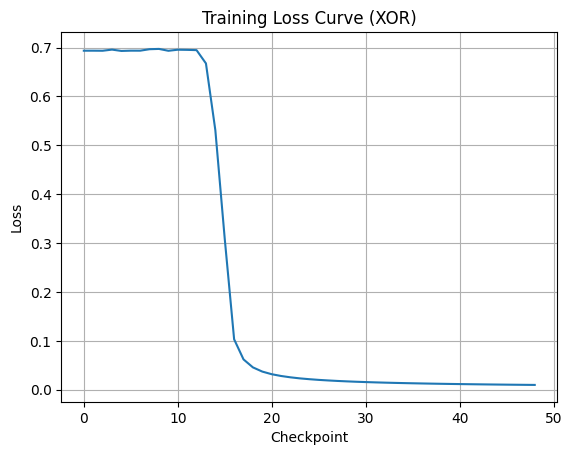

In [6]:
# Plot the Training loss

plt.plot(model.loss_history)
plt.xlabel("Checkpoint")
plt.ylabel("Loss")
plt.title("Training Loss Curve (XOR)")
plt.grid(True)
plt.show()


---

## **Training Loss Curve (XOR)**

The training loss curve demonstrates the **successful learning behavior** of the multi-layer perceptron on the XOR problem.

* Initially, the loss remains high (≈ 0.69), indicating that the network starts with **random weights** and behaves like a random classifier.
* After several checkpoints, a **sharp drop in loss** is observed. This indicates the point at which the hidden layers begin to learn meaningful nonlinear representations of the XOR function.
* Following the sharp decline, the loss decreases gradually and **converges close to zero**, showing that the network has effectively minimized the error.
* The smooth downward trend after convergence reflects **stable gradient flow** and correct backpropagation.
* The final near-zero loss confirms that the model has **successfully learned the XOR mapping**, which is not linearly separable.


The loss curve validates that the neural network is correctly implemented and trained, with effective weight updates and convergence toward an optimal solution.

---

In [7]:
# Testing for all XOR gate operations
for x,y in zip(X,y):
    print(f"Input: {x}\tExpected: {y}\tPredicted: {model.predict(x)}")

Input: [0 0]	Expected: [0]	Predicted: [0]
Input: [0 1]	Expected: [1]	Predicted: [1]
Input: [1 0]	Expected: [1]	Predicted: [1]
Input: [1 1]	Expected: [0]	Predicted: [0]


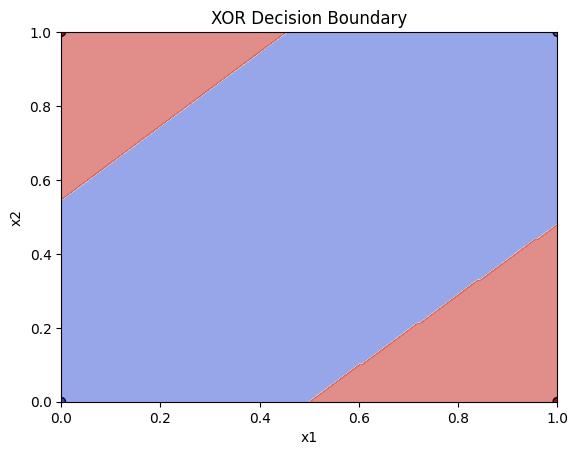

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid
xx, yy = np.meshgrid(
    np.linspace(0, 1, 200),
    np.linspace(0, 1, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]

# Predict for each point
preds = np.array([model.predict(point)[0] for point in grid])
preds = preds.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, preds, alpha=0.6, cmap="coolwarm")

# Plot XOR points
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", cmap="coolwarm")
plt.title("XOR Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


---

## **XOR Decision Boundary Plot**

The decision boundary plot provides a **geometric interpretation** of how the neural network solves the XOR problem.

* The plot shows **non-linear decision regions**, confirming that the network has learned a representation beyond linear separation.
* The diagonal and curved boundary segments indicate that the hidden layers have transformed the input space into a representation where XOR classes become separable.
* Each of the four XOR input points lies in the **correct classification region**, demonstrating perfect classification.
* The presence of multiple regions with different class assignments highlights the role of **hidden neurons in feature transformation**.
* This visualization confirms that the network is not memorizing inputs, but instead learning a **generalizable nonlinear decision function**.

The decision boundary clearly shows that the neural network has learned the intrinsic non-linear structure of the XOR problem, validating the effectiveness of hidden layers and activation functions.

---